In [6]:
using ITensors
using Plots
L = 20;
N = 1;
G² = 1.0;
m = 0.3;
sites = siteinds("Fermion", L);
# lattice_large - lattice_small = 2 
function GrossNeveu(L)
    lₛ = L-2;
#     sites = siteinds("Fermion",L)
    ampoₗ = OpSum()
    ampoₛ = OpSum()
    # Large Lattice 
    for j in 1:L-N
        ampoₗ -= 1im,"C",j,"Cdag",j+N
        ampoₗ += 1im,"C",j+N,"Cdag",j
    end
    for j in 1:N:L-N
        ampoₗ += (G²/2),"C * Cdag",j
    end
    for j in 1:L
        ampoₗ += (m*(-1)^j),"C * Cdag",j
    end
    Hₗ = MPO(ampoₗ, sites[1:L])
    ψₗ₀ = randomMPS(sites[1:L],100)
    ######################################
    ## small lattice 
    for j in 1:lₛ-N
        ampoₛ -= 1im,"C",j,"Cdag",j+N
        ampoₛ += 1im,"C",j+N,"Cdag",j
    end
    for j in 1:N:lₛ-N
        ampoₛ += (G²/2),"C * Cdag",j
    end
    for j in 1:lₛ
        ampoₛ += (m*(-1)^j),"C * Cdag",j 
    end
    ampoₛ += "C",lₛ+1,"Cdag",lₛ+1
    ampoₛ += "C",lₛ+2,"Cdag",lₛ+2
    Hₛ = MPO(ampoₛ,sites[1:L])
    ψₛ₀ = randomMPS(sites[1:L],100)
    sweep = Sweeps([
     "maxdim" "mindim" "cutoff" 
      10       2       1e-16    
      30       10      1e-16    
      50       20      1e-16    
      1000     30      1e-18    
      1024     50      1e-18
     ])
    eₗ₀,ψₗ = dmrg(Hₗ,ψₗ₀,sweep,outputlevel=0)
    eₛ₀,ψₛ = dmrg(Hₛ,ψₛ₀,sweep,outputlevel=0)
    return ψₛ, ψₗ
end

GrossNeveu (generic function with 1 method)

In [7]:
inner_sl = Vector{Float64}()
for j in 2:20
    println(j)
    ψₛ, ψₗ = GrossNeveu(j)
    push!(inner_sl, norm(inner(ψₛ,ψₗ)))
end

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [8]:
norm_sl = nothing

In [9]:
norm_sl = Vector{Float64}()
for j in 1:length(inner_sl)
    push!(norm_sl, norm(inner_sl[j]) )
end

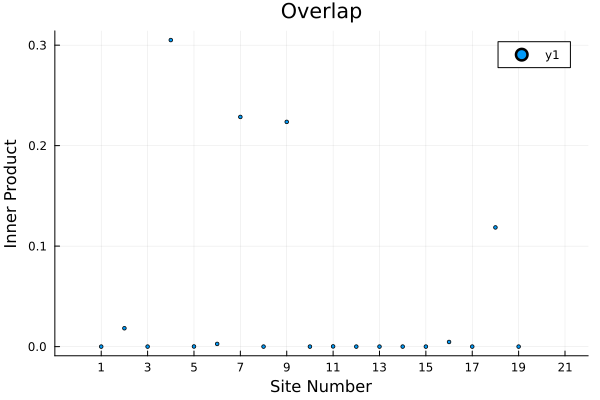

In [12]:
x = [x for x in 1:length(norm_sl)]
scatter(x,norm_sl,
    xlim=(-1,22),xticks=((1:2:51)), 
#     ylim=(-0.02,1), 
#     yticks=((-0.01:0.01:0.1)),   
    markersize=2,
    xlabel="Site Number",
    ylabel="Inner Product",
    title="Overlap")
# savefig("one_norm.svg")